## DATA PRE-PROCESSING AND VISUALIZATION
### AUTHOR:

In [1]:
#import necessary libraries
import json
import itertools

### TASK 1

In [2]:
import csv
# csv file name
acw_user_data = "user_data.csv"

with open(acw_user_data, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter = ',')
    count = 0
    for row in data:
        if count == 0:
            print("FIELD_NAME_ARE: %s" % (row))
            count += 1
        else:
            print("THE_ROW_VALUES_ARE: %s" % (row))
            count += 1
      
            

FIELD_NAME_ARE: ['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
THE_ROW_VALUES_ARE: ['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '18-Aug', '27-Nov', '6.76374E+11', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'TRUE', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
THE_ROW_VALUES_ARE: ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '12-Aug', '26-Nov', '4.52944E+15', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'FALSE', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe

### TASK 2

In [3]:
#open the csv file and read using the csv dictreader
with open('user_data.csv') as csvfile:
    file = list(csv.DictReader(csvfile))

In [4]:
#creating an empty address list to input customers address details from the list all_ 
Address = []

#loop through the list and the itertools.group by function returns key for all the address columns indicated and list of group items
for k, g in itertools.groupby(
        file, 
        key =lambda x: (x['Address Street'], x['Address City'], x['Address Postcode'])):
    Address.append({
        'Address Street': k[0],
        'Address City': k[1],
        'Address Postcode': k[2]
    })

In [5]:
#Create an empty list for Vehicle details
Vehicle = []
#loop through the list to get Vehicle details
for k, g in itertools.groupby(
        file, 
        key =lambda r: (r['Vehicle Make'], r['Vehicle Model'], 
                        r['Vehicle Type'], r['Vehicle Year'])):
    Vehicle.append({
        'Vehicle Make': k[0],
        'Vehicle Model': k[1],
        'Vehicle Type': k[2],
        'Vehicle Year': k[3]
        })

In [6]:
#Change vehicle details key to their appropriate data type


#initializing change key

vehicle_year_key = "Vehicle Year"

for sub in Vehicle:
    sub[vehicle_year_key] = int(sub[vehicle_year_key])
    
    #print the first element of the vehicle list with converted vehicle year

print("The converted Vehicle details Dictionary list : " + str(Vehicle[0]))


The converted Vehicle details Dictionary list : {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Type': 'Pickup', 'Vehicle Year': 2009}


In [7]:
#create an empty list for customer credit card information
Credit_Card_info = []

#loop through the overall list to get the appropriate information of customers credit card information
for k, g in itertools.groupby(
    file,
    key =lambda r: (r['Credit Card Start Date'], r['Credit Card Expiry Date'], 
                    r['Credit Card CVV'], r['Credit Card Number'], r['Bank IBAN'])):
    Credit_Card_info.append({
        'Credit Card Start Date': k[0],
        'Credit Card Expiry Date': k[1],
        'Credit Card CVV': k[2],
        'Credit Card Number': k[3],
        'Bank IBAN': k[4]
        })

In [8]:
#convert card number, and card cvv from string to float and integer

#initializing change key

cvv_key = "Credit Card CVV"

for sub in Credit_Card_info:
    sub[cvv_key] = int(sub[cvv_key])

#initializing change key

number_key = "Credit Card Number"

for sub in Credit_Card_info:
    sub[number_key] = float(sub[number_key])

#printing the first element of the converted list

print("The converted Credit Card details Dictionary list : " + str(Credit_Card_info[0]))


The converted Credit Card details Dictionary list : {'Credit Card Start Date': '18-Aug', 'Credit Card Expiry Date': '27-Nov', 'Credit Card CVV': 875, 'Credit Card Number': 676374000000.0, 'Bank IBAN': 'GB62PQKB71416034141571'}


In [9]:
#create an empty list to input any other customer information avaliable in the list
Customer_Details = []
for k, g in itertools.groupby(
        file, 
        key =lambda r: (r['First Name'], r['Last Name'], r['Age (Years)'],
                       r['Marital Status'], r['Distance Commuted to Work (miles)'], r['Employer Company'],
                       r["Dependants"], r['Yearly Pension (GBP)'], r['Sex'], r['Retired'], r['Yearly Salary (GBP)'])):
    Customer_Details.append({
        'First Name': k[0],
        'Last Name': k[1],
        'Age (Years)': k[2],
        'Marital Status': k[3],
        'Distance Commuted to Work (miles)': k[4],
        'Employer Company': k[5],
        'Dependants': k[6],
        'Yearly Pension (GBP)': k[7],
        'Sex': k[8],
        'Retired': k[9],
        'Yearly Salary (GBP)': k[10]
        })



### TASK 3

In [10]:
#access and extract customers details with empty depandants
Customers_with_dependant_issues = [d for d in Customer_Details if d['Dependants'] == '']

#check how many customer has an empty dependants entry
print(len(Customers_with_dependant_issues))

#print the first customer with dependant issue
print(Customers_with_dependant_issues[0])

#https://stackoverflow.com/questions/7900882/extract-item-from-list-of-dictionaries

19
{'First Name': 'Sian', 'Last Name': 'Marshall', 'Age (Years)': '40', 'Marital Status': 'married or civil partner', 'Distance Commuted to Work (miles)': '11.98', 'Employer Company': 'Frost-Howard', 'Dependants': '', 'Yearly Pension (GBP)': '0', 'Sex': 'Female', 'Retired': 'FALSE', 'Yearly Salary (GBP)': '44434'}


In [11]:
#cycle through replacement values 1:5 by using an infinite generator with itertools.cycle

from itertools import cycle
cycl_1_5 = cycle([1,2,3,4,5])

#loop through the customer detail entries directly replacing the missing values
for customer in Customer_Details:
    if customer['Dependants'] == '':
        replacement = next(cycl_1_5)
        customer['Dependants'] = replacement
#https://stackoverflow.com/questions/75676097/replace-empty-entries-in-a-dictionary-with-a-range-of-elements?noredirect=1#comment133506404_75676097

In [12]:
#access and extract customers details with empty depandants
Customers_with_dependant_issues = [d for d in Customer_Details if d['Dependants'] == '']

#re-check how many customers has an empty dependants entry

print(len(Customers_with_dependant_issues))

0


In [13]:
#Change customer details key to their appropriate data type


#initializing change key

age_key = "Age (Years)"

for sub in Customer_Details:
    sub[age_key] = int(sub[age_key])

#initializing change key

distance_key = "Distance Commuted to Work (miles)"

for sub in Customer_Details:
    sub[distance_key] = float(sub[distance_key])

#initializing change key

dependant_key = "Dependants"

for sub in Customer_Details:
    sub[dependant_key] = int(sub[dependant_key])

#initializing change key

pension_key = "Yearly Pension (GBP)"

for sub in Customer_Details:
    sub[pension_key] = int(sub[pension_key])


#initializing change key

salary_key = "Yearly Salary (GBP)"

for sub in Customer_Details:
    sub[salary_key] = int(sub[salary_key])
    # printing result
print("The converted Customer Details Dictionary list : " + str(Customer_Details[0]))

#https://www.geeksforgeeks.org/python-change-type-of-key-in-dictionary-list/

The converted Customer Details Dictionary list : {'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Marital Status': 'married or civil partner', 'Distance Commuted to Work (miles)': 0.0, 'Employer Company': 'N/A', 'Dependants': 3, 'Yearly Pension (GBP)': 7257, 'Sex': 'Male', 'Retired': 'TRUE', 'Yearly Salary (GBP)': 72838}


### TASK 4

In [14]:
processed_list = [{**d, **md, **df, **dd} for d, md, df, dd in zip(Customer_Details, 
                                                                     Address, Credit_Card_info, Vehicle)]

#https://python.tutorialink.com/how-to-merge-a-nested-list-of-dictionaries-with-other-list-of-dictionaries/

In [15]:
#write processed file records into a json file

with open('processed.json', 'w') as file:
    json.dump(processed_list, file, indent=4)

### TASK 5

In [16]:
#extract a list of retired customers
retired_customer_details = [d for d in Customer_Details if d['Retired'] == 'TRUE'] 

In [17]:
#combine the list of retired customers with their respective details
retired_list = [{**d, **md, **df, **dd} for d, md, df, dd in zip(retired_customer_details, 
                                                                     Address, Credit_Card_info, Vehicle)]
#https://python.tutorialink.com/how-to-merge-a-nested-list-of-dictionaries-with-other-list-of-dictionaries/

In [18]:
#write retired file as a json file
with open("retired.json", "w") as file:
    json.dump(retired_list, file, indent = 4)

In [19]:
#extracting list of customers with employment 

employed_customer = [d for d in Customer_Details if not d['Employer Company'] == 'N/A']
print(json.dumps(employed_customer[0], indent = 4))

{
    "First Name": "Jonathan",
    "Last Name": "Thomas",
    "Age (Years)": 46,
    "Marital Status": "married or civil partner",
    "Distance Commuted to Work (miles)": 13.72,
    "Employer Company": "Begum-Williams",
    "Dependants": 1,
    "Yearly Pension (GBP)": 0,
    "Sex": "Male",
    "Retired": "FALSE",
    "Yearly Salary (GBP)": 54016
}


In [20]:
#number of employed customers
print(len(employed_customer))

754


In [21]:
#create a combined list of employed customer details 
employed_list = [{**d, **md, **df, **dd} for d, md, df, dd in zip(employed_customer, 
                                                                     Address, Credit_Card_info, Vehicle)]

#https://python.tutorialink.com/how-to-merge-a-nested-list-of-dictionaries-with-other-list-of-dictionaries/

In [22]:
#write the employed list as a json file
with open("employed.json", "w") as file:
    json.dump(employed_list, file, indent = 4)

### TASK 6

In [23]:
#read the single credit card expiray date problematic row

csvfile = open('user_data.csv','r')
prob_row = [] #empty list for problematic row
for row in csv.reader(csvfile, delimiter = ','):
    prob_row.append(row)
print(prob_row[991]) #for credit card expiry date problematic row

['Studio 58D Hill dam', 'West Owenview', 'B48 1FB', '30', '11.68', 'Ashton, Tucker and Davies', '14-Aug', '04/32', '4.54705E+15', '401', '1', 'Bradley', 'GB44HFCB98336374626479', 'Thompson', 'married or civil partner', '0', 'FALSE', '42838', 'Male', 'Freightliner', 'Nautilus', '2011', 'Wagon, Convertible']


In [24]:
prob_row = prob_row[991] #for credit card detail problematic row

#get credit card start date of problematic row

prob_start_date = prob_row[6]
print(prob_start_date)

#get credit card expiry date of problematic row
prob_expiry_date = prob_row[7]
print(prob_expiry_date)

14-Aug
04/32


In [25]:
#convert credit card dates from strings to datetime type
from datetime import datetime, date, timedelta

prob_start_date = datetime.strptime("14-Aug", '%d-%b').replace(year = 2013) #input the date string format and input correct year
print(prob_start_date)

#for card expiry date
prob_expiry_date = datetime.strptime("04/32", '%m/%y').replace(year = 1932)
print(prob_expiry_date)

2013-08-14 00:00:00
1932-04-01 00:00:00


In [26]:
#define the year diff function to flag error in credit card details
def yeardiff(start_year, end_year):
    start_year = prob_start_date.year
    end_year = prob_expiry_date.year
    if start_year - end_year > 10:
        print("REMOVE CREDIT CARD!!")
    else:
        print("CREDIT CARD HAS NO ISSUES")

In [27]:
yeardiff(prob_start_date, prob_start_date)

REMOVE CREDIT CARD!!


In [28]:
#function to get problematic credit card detail list and write into a json file
def get_prob_row(prob_row):
    for item in processed_list:
        processed_list == prob_row
        return[processed_list[990]] #input index of problematic row in processed list

In [29]:
prob_list = get_prob_row(prob_row)

#write the problematic list for credit card details as a json file
with open("remove_ccard.json", "w") as file:
    json.dump(prob_list, file, indent = 4)

### TASK 7

In [30]:
with open ("processed.json") as file:
    data = json.load(file)
    for item in Customer_Details:
        item['Distance Commuted to Work (miles)'] <= 1.0
        item['Salary-Commute'] = item['Yearly Salary (GBP)']
        print("{} = {}".format(item["Distance Commuted to Work (miles)"], item["Salary-Commute"]))
        

        
for item in Customer_Details:
    if item["Distance Commuted to Work (miles)"] > 1.0:
        item['Salary-Commute'] = item['Yearly Salary (GBP)'] / item['Distance Commuted to Work (miles)']
        print("{} = {}".format(item["Distance Commuted to Work (miles)"], item["Salary-Commute"])) 
#https://stackoverflow.com/questions/50479199/mathematical-operation-on-a-dictionary-list-python-3-6


0.0 = 72838
13.72 = 54016
16.02 = 68049
19.35 = 91337
5.94 = 18446
10.73 = 38100
20.05 = 96645
0.0 = 27964
15.29 = 63433
0.0 = 66157
11.11 = 39983
7.5 = 24062
20.21 = 97948
9.48 = 32281
0.0 = 59891
17.53 = 78214
18.76 = 86961
6.65 = 20918
11.2 = 40432
15.12 = 62377
18.23 = 83114
11.98 = 44434
17.76 = 79823
17.22 = 76038
17.57 = 78499
10.68 = 37866
16.42 = 70655
17.64 = 78955
19.49 = 92384
19.67 = 93744
14.53 = 58770
7.21 = 22959
0.0 = 80297
18.81 = 87308
0.0 = 70109
0.0 = 57953
12.44 = 46864
0.0 = 81220
15.36 = 63857
9.85 = 33987
7.65 = 24652
6.45 = 20206
20.08 = 96882
17.96 = 81215
6.35 = 19863
15.52 = 64885
0.0 = 59223
9.28 = 31412
5.81 = 18005
19.12 = 89661
18.78 = 87098
7.57 = 24329
0.0 = 97406
0.0 = 26452
5.58 = 17245
11.51 = 41981
17.08 = 75117
0.0 = 92899
0.0 = 59872
14.39 = 57934
14.02 = 55758
0.0 = 62907
17.34 = 76921
15.91 = 67367
11.95 = 44279
11.01 = 39466
19.13 = 89697
11.99 = 44472
0.0 = 90989
19.27 = 90740
17.74 = 79692
14.97 = 61470
13.28 = 51461
15.55 = 65036
0.0 = 662

In [31]:
print(json.dumps(Customer_Details[0:8], indent = 4))

[
    {
        "First Name": "Kieran",
        "Last Name": "Wilson",
        "Age (Years)": 89,
        "Marital Status": "married or civil partner",
        "Distance Commuted to Work (miles)": 0.0,
        "Employer Company": "N/A",
        "Dependants": 3,
        "Yearly Pension (GBP)": 7257,
        "Sex": "Male",
        "Retired": "TRUE",
        "Yearly Salary (GBP)": 72838,
        "Salary-Commute": 72838
    },
    {
        "First Name": "Jonathan",
        "Last Name": "Thomas",
        "Age (Years)": 46,
        "Marital Status": "married or civil partner",
        "Distance Commuted to Work (miles)": 13.72,
        "Employer Company": "Begum-Williams",
        "Dependants": 1,
        "Yearly Pension (GBP)": 0,
        "Sex": "Male",
        "Retired": "FALSE",
        "Yearly Salary (GBP)": 54016,
        "Salary-Commute": 3937.026239067055
    },
    {
        "First Name": "Antony",
        "Last Name": "Jones",
        "Age (Years)": 22,
        "Marital Status": "m

In [32]:
Customer_Details.sort(key=lambda item: item.get("Salary-Commute"))

#https://therenegadecoder.com/code/how-to-sort-a-list-of-dictionaries-in-python/

In [33]:
#combine all the list created into a list of dictionaries 
commute_list = [{**d, **md, **df, **dd} for d, md, df, dd in zip(Customer_Details, 
                                                                     Address, Credit_Card_info, Vehicle)]

#https://python.tutorialink.com/how-to-merge-a-nested-list-of-dictionaries-with-other-list-of-dictionaries/

In [34]:
with open("commute.json", "w") as file:
    json.dump(commute_list, file, indent = 4)

### DATA VISUALIZATION

In [35]:
!pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [36]:
import pandas as pd
import seaborn as sb

In [37]:
#read the file using pandas
df = pd.read_csv("user_data.csv")
df.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,18-Aug,27-Nov,6.763740e+11,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,12-Aug,26-Nov,4.529440e+15,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,19-Nov,27-Jul,4.091730e+18,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,17-Oct,18-Apr,4.671330e+18,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",19-Apr,27-Nov,2.245090e+15,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [38]:
#access df data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Address Street                     1000 non-null   object 
 1   Address City                       1000 non-null   object 
 2   Address Postcode                   1000 non-null   object 
 3   Age (Years)                        1000 non-null   int64  
 4   Distance Commuted to Work (miles)  1000 non-null   float64
 5   Employer Company                   754 non-null    object 
 6   Credit Card Start Date             1000 non-null   object 
 7   Credit Card Expiry Date            1000 non-null   object 
 8   Credit Card Number                 1000 non-null   float64
 9   Credit Card CVV                    1000 non-null   int64  
 10  Dependants                         981 non-null    float64
 11  First Name                         1000 non-null   object

### TASK 1

In [39]:
df[["Age (Years)", "Yearly Salary (GBP)"]].head()

,Age (Years),Yearly Salary (GBP)
0,89,72838
1,46,54016
2,22,68049
3,56,91337
4,57,18446


In [40]:
Age_series = pd.Series(df["Age (Years)"])
Salary_series = pd.Series(df["Yearly Salary (GBP)"])

#https://www.geeksforgeeks.org/select-a-single-column-of-data-as-a-series-in-pandas/

In [41]:
#Age series
Age_series.head()

0    89
1    46
2    22
3    56
4    57
Name: Age (Years), dtype: int64

In [42]:
#Salary series
Salary_series.head()

0    72838
1    54016
2    68049
3    91337
4    18446
Name: Yearly Salary (GBP), dtype: int64

In [43]:
# Checking type
print(type(Age_series))
print(type(Salary_series))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [44]:
#mean of customers salaries
Salary_series.mean()

57814.078

In [45]:
#median of age
Age_series.median()

54.0

### UNIVARIATE PLOT

### TASK 2

#### 1

In [46]:
Age_df = df[["Age (Years)"]]

In [47]:
import numpy as np
#calcuate the number of bins required
binwidth = 5
bins = int(np.ceil((Age_df.max() - Age_df.min()) / binwidth))
bins

#https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8

15

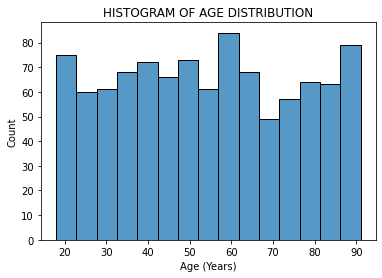

In [48]:
#plot histogram of age
fig = sb.histplot(data = df[["Age (Years)"]],
                  x = "Age (Years)", bins = bins).set_title("HISTOGRAM OF AGE DISTRIBUTION").get_figure();

#to save this plot  
fig.savefig('age_hist.png')

#https://seaborn.pydata.org/generated/seaborn.histplot.html

The histogram above shows the distribution of customer's age with the highest number of customers being in their sixties followed by customers in their twenties and late eighties

#### 2

In [49]:
#distinct count of dependants in the df
df['Dependants'].value_counts()

2.0    460
1.0    255
3.0    178
4.0     54
5.0     34
Name: Dependants, dtype: int64

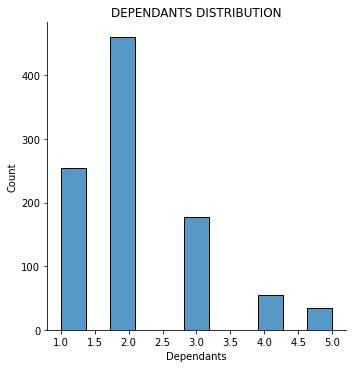

In [50]:
#displot of customers with depedants
fig = sb.displot(df[df['Dependants'].notnull()]['Dependants']).set(title = "DEPENDANTS DISTRIBUTION");

fig.savefig("dependants_distribution.png")

#https://stackoverflow.com/questions/32902832/what-to-do-with-missing-values-when-plotting-with-seaborn

#### 3

In [51]:
#extracting age and marital status of customers
df[["Age (Years)", "Marital Status"]].head()

,Age (Years),Marital Status
0,89,married or civil partner
1,46,married or civil partner
2,22,married or civil partner
3,56,married or civil partner
4,57,married or civil partner


In [52]:
#accessing distinct count of marital status of customers
df["Marital Status"].value_counts()

married or civil partner    541
single                      330
divorced                     71
widowed                      58
Name: Marital Status, dtype: int64

In [53]:
#customers df with married marital status
df_married = df[df["Marital Status"] == "married or civil partner"]

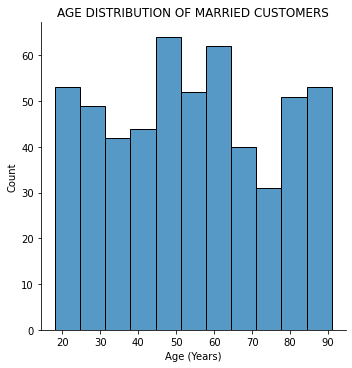

In [54]:
#displot of age distribution of married customers
fig_2 = sb.displot(data = df_married,
                   x = "Age (Years)").set(title = "AGE DISTRIBUTION OF MARRIED CUSTOMERS");

fig_2.savefig("age dist of married customers.png")

In [55]:
#customers df with marital status = single
df_single = df[df["Marital Status"] == "single"]

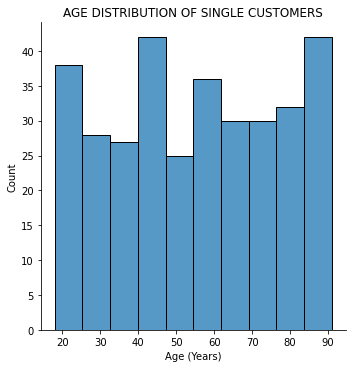

In [56]:
#displot of age distribution of single customers
fig_3 = sb.displot(data = df_single, 
                   x = "Age (Years)").set(title = "AGE DISTRIBUTION OF SINGLE CUSTOMERS");


fig_3.savefig("age dist of single customers.png")

In [57]:
#customers df with widowed marital status
df_widowed = df[df["Marital Status"] == "widowed"]

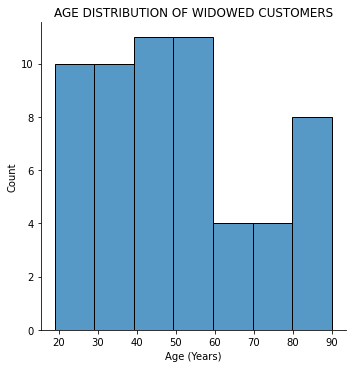

In [58]:
#displot of age distribution of widowed customers
fig_4 = sb.displot(data = df_widowed,
                   x = "Age (Years)").set(title = "AGE DISTRIBUTION OF WIDOWED CUSTOMERS");


fig_4.savefig("age dist of widowed customers.png")

### MULTIVARIATE PLOTS

#### TASK 3

In [59]:
#extract distance and salary details from their respective columns in the df
df[["Distance Commuted to Work (miles)", "Yearly Salary (GBP)"]].head()

,Distance Commuted to Work (miles),Yearly Salary (GBP)
0,0.00,72838
1,13.72,54016
2,16.02,68049
3,19.35,91337
4,5.94,18446


In [60]:
#convert distance data type from float to int
df['Distance Commuted to Work (miles)'] = df['Distance Commuted to Work (miles)'].apply("int64")
#df_3.loc[df_3["Distance Commuted to Work (miles)"]].astype("int64")

#### 1

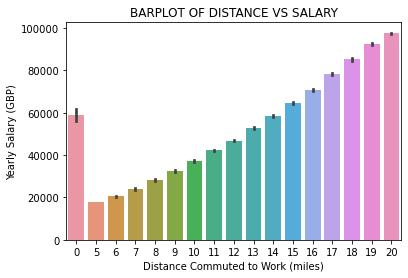

In [61]:
#barplot showing th relationship between distance to work and salary of customers
fig_5 = sb.barplot(x = "Distance Commuted to Work (miles)", y = "Yearly Salary (GBP)",
                   data = df[["Distance Commuted to Work (miles)", 
                              "Yearly Salary (GBP)"]]).set_title("BARPLOT OF DISTANCE VS SALARY").get_figure();


fig_5.savefig("distance vs salary.png")

#### 2

In [62]:
#extract the age and salary column in df
df[["Age (Years)", "Yearly Salary (GBP)"]].head()

,Age (Years),Yearly Salary (GBP)
0,89,72838
1,46,54016
2,22,68049
3,56,91337
4,57,18446


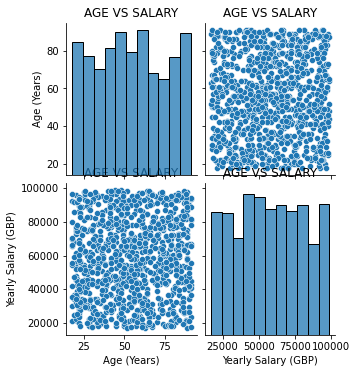

In [63]:
#pairplot to show the relationship between this two customer detail
fig_6 = sb.pairplot(df[["Age (Years)", 
                        "Yearly Salary (GBP)"]]).set(title = "AGE VS SALARY");


fig_6.savefig("Age Vs Salary.png")

#https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

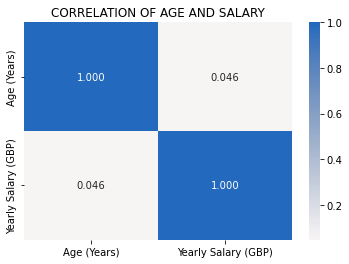

In [64]:
#to confirm the correlation between the two columns
sb.heatmap(df[["Age (Years)", "Yearly Salary (GBP)"]].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0).set(title = "CORRELATION OF AGE AND SALARY");

#### 3

In [65]:
#create a new df with age, salary and dependant detail
df_new = df[["Age (Years)", "Yearly Salary (GBP)", "Dependants"]]
df_new.head()

,Age (Years),Yearly Salary (GBP),Dependants
0,89,72838,3.0
1,46,54016,1.0
2,22,68049,1.0
3,56,91337,2.0
4,57,18446,2.0


In [66]:
#drop null values in the dependant column
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age (Years)          981 non-null    int64  
 1   Yearly Salary (GBP)  981 non-null    int64  
 2   Dependants           981 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 30.7 KB


In [67]:
#convert dependants from float to int
df_new["Dependants"] = df_new["Dependants"].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age (Years)          981 non-null    int64
 1   Yearly Salary (GBP)  981 non-null    int64
 2   Dependants           981 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 26.8 KB


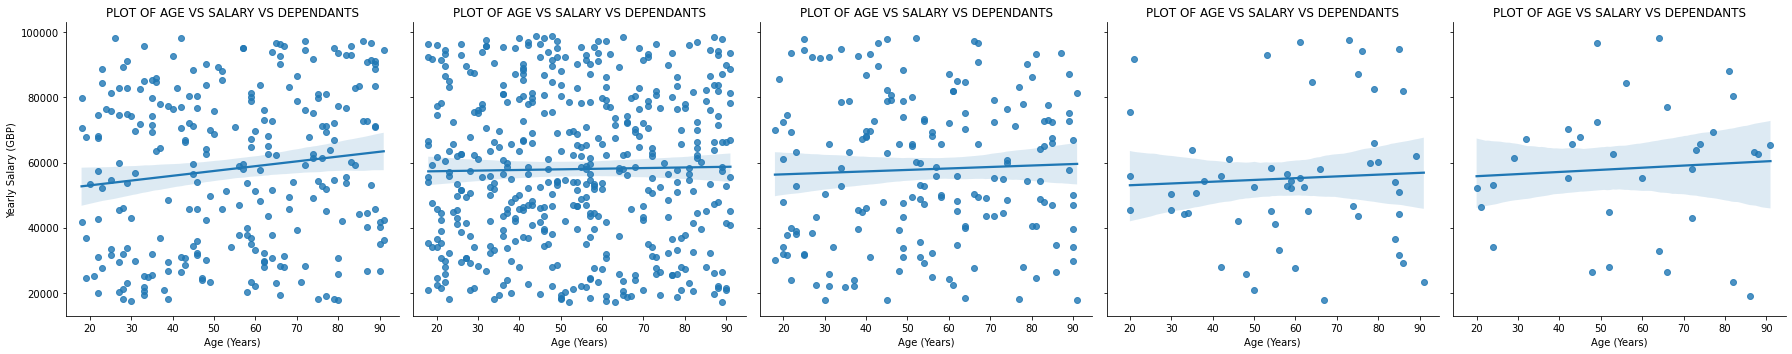

In [68]:
#scatter plot with linear regression line of dependants 1-5 
fig_7 = sb.lmplot(x='Age (Years)', y ='Yearly Salary (GBP)'
                  , col ='Dependants',data = df_new).set(title = "PLOT OF AGE VS SALARY VS DEPENDANTS");


fig_7.savefig("Age vs Salary and Dependants.png")